# Data Science Job Change Prediction
- Author: Le Liu
- Course: COMP3010J Machine Learning


## 1. Project Overview

This project aims to predict whether a candidate is looking for a job change based on various demographic and professional features. Then infer the key factors influencing their decision.

**Dataset:** `data-science-job-change.csv`

**Problem Type:** Binary Classification

**Target Variable:** `target` (1.0 = Looking for job change, 0.0 = Not looking for job change)



*Project Structure*

1. **Introduction** - Project overview and objectives
2. **Load and Analyse Data** - Data loading and initial exploration
3. **Data Cleaning** - Handle missing values and data quality issues
4. **Data Visualisation** - Exploratory data analysis with plots
5. **Attribute Selection** - Feature selection and engineering
6. **Model Selection and Experiments** - Train and compare models
7. **Final Model Training** - Train the best model
8. **Further Analysis and Discussion** - Model interpretation
9. **Discussion** - Conclusions and future work

---
## 2. Data Loading & Analysis

In [75]:
# Load the dataset
import pandas as pd


df = pd.read_csv('data-science-job-change.csv')

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nFirst 5 rows of the dataset:")
df.head()

Dataset shape: (19158, 14)
Number of rows: 19158
Number of columns: 14

First 5 rows of the dataset:


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [76]:
# Display statistical summary
print("Statistical Summary:")
print("="*60)
numerical_cols = ['city_development_index', 'training_hours', 'target']
df[numerical_cols].describe()

Statistical Summary:


,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000
mean,0.828848,65.366896,0.249348
std,0.123362,60.058462,0.432647
min,0.448000,1.000000,0.000000
25%,0.740000,23.000000,0.000000
50%,0.903000,47.000000,0.000000
75%,0.920000,88.000000,0.000000
max,0.949000,336.000000,1.000000


In [77]:
# Check missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(3),
    'Data_Type': df.dtypes,
    'Unique_Values': [df[col].nunique() for col in df.columns]
})

print("Data Health Report:")
print("="*80)
print(missing_data.to_string(index=False))

Data Health Report:
                Column  Missing_Count  Missing_Percentage Data_Type  Unique_Values
           enrollee_id              0               0.000     int64          19158
                  city              0               0.000    object            123
city_development_index              0               0.000   float64             93
                gender           4508              23.531    object              3
   relevent_experience              0               0.000    object              2
   enrolled_university            386               2.015    object              3
       education_level            460               2.401    object              5
      major_discipline           2813              14.683    object              6
            experience             65               0.339    object             22
          company_size           5938              30.995    object              8
          company_type           6140              32.049    object

### 2.1 Target Variable Analysis (Class Balance Check)

TARGET VARIABLE ANALYSIS: 'target' (Job Change Intention)

Class Distribution:
--------------------------------------------------
  Class 0 (Not Looking for Change   ): 14,381 (75.07%)
  Class 1 (Looking for Change       ):  4,777 (24.93%)

Imbalance Ratio: 3.01:1


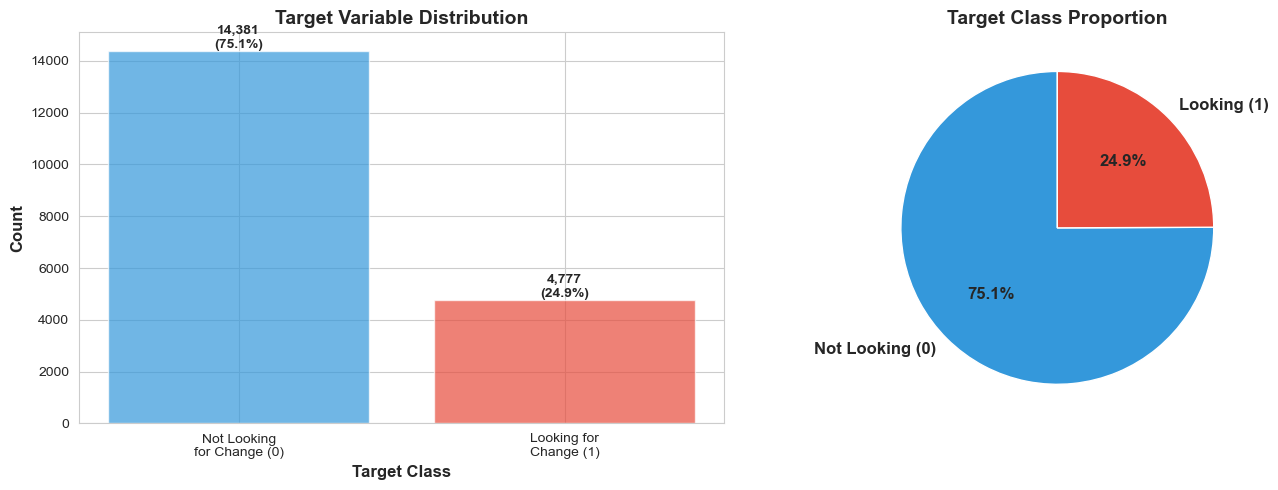

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Target variable analysis
print("=" * 80)
print("TARGET VARIABLE ANALYSIS: 'target' (Job Change Intention)")
print("=" * 80)

target_counts = df['target'].value_counts().sort_index()
target_pct = df['target'].value_counts(normalize=True).sort_index() * 100

print("\nClass Distribution:")
print("-" * 50)
for val, count, pct in zip(target_counts.index, target_counts.values, target_pct.values):
    label = "Not Looking for Change" if val == 0.0 else "Looking for Change"
    print(f"  Class {int(val)} ({label:25s}): {count:>6,} ({pct:>5.2f}%)")

# Calculate imbalance ratio
imbalance_ratio = target_counts.max() / target_counts.min()
print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")


# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].bar(target_counts.index, target_counts.values, color=['#3498db', '#e74c3c'], alpha=0.7)
axes[0].set_xlabel('Target Class', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Target Variable Distribution', fontsize=14, fontweight='bold')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Not Looking\nfor Change (0)', 'Looking for\nChange (1)'])
for i, (val, count) in enumerate(zip(target_counts.index, target_counts.values)):
    axes[0].text(i, count, f'{count:,}\n({target_pct.values[i]:.1f}%)', 
                 ha='center', va='bottom', fontweight='bold')

# Pie chart
colors = ['#3498db', '#e74c3c']
axes[1].pie(target_counts.values, labels=['Not Looking (0)', 'Looking (1)'], 
           autopct='%1.1f%%', colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Target Class Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)

### 2.2 Numerical Features Analysis

NUMERICAL FEATURES ANALYSIS

Feature: 'city_development_index'
------------------------------------------------------------
   Count:        19,158
   Mean:         0.8288
   Median:       0.9030
   Std Dev:      0.1234
   Min:          0.4480
   Max:          0.9490
   Range:        0.5010
   Value Range: [0.4479999999999999, 0.949]

   Skewness:    -0.9953  Left-skewed / Negative skew)
   Kurtosis:    -0.5387  (Normal tail)

   Outliers:         17 (0.09%)
   IQR Range: [0.4700, 1.1900]

Feature: 'training_hours'
------------------------------------------------------------
   Count:        19,158
   Mean:        65.3669
   Median:      47.0000
   Std Dev:     60.0585
   Min:          1.0000
   Max:        336.0000
   Range:      335.0000
   Value Range: [1, 336]

   Skewness:     1.8191  (Right-skewed / Positive skew)
   Kurtosis:     3.8392  (Heavy-tailed / Outliers present)

   Outliers:        984 (5.14%)
   IQR Range: [-74.5000, 185.5000]



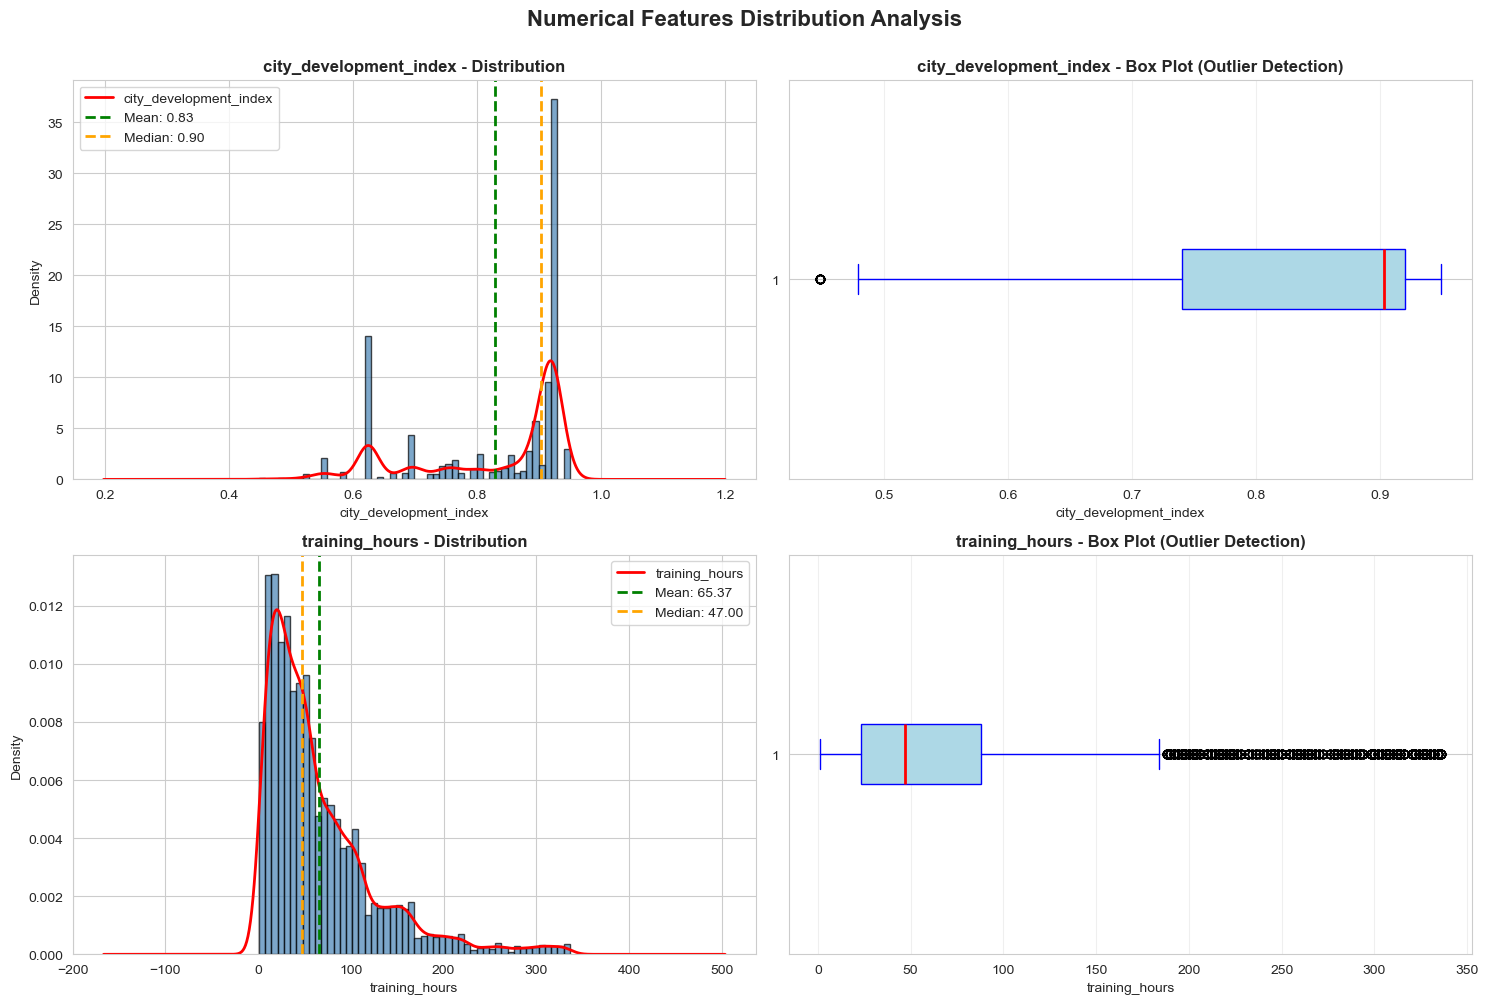

In [79]:
from scipy import stats

# Select numerical features
numerical_features = ['city_development_index', 'training_hours']

print("=" * 80)
print("NUMERICAL FEATURES ANALYSIS")
print("=" * 80)

# Detailed statistics for each numerical feature
for col in numerical_features:
    print(f"\nFeature: '{col}'")
    print("-" * 60)
    
    data = df[col].dropna()
    
    # Basic statistics
    print(f"   Count:    {len(data):>10,}")
    print(f"   Mean:     {data.mean():>10.4f}")
    print(f"   Median:   {data.median():>10.4f}")
    print(f"   Std Dev:  {data.std():>10.4f}")
    print(f"   Min:      {data.min():>10.4f}")
    print(f"   Max:      {data.max():>10.4f}")
    print(f"   Range:    {data.max() - data.min():>10.4f}")
    print(f"   Value Range: [{data.min()}, {data.max()}]")
    
    # Distribution shape
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    print(f"\n   Skewness: {skewness:>10.4f}  ", end="")
    if abs(skewness) < 0.5:
        print("(Nearly symmetric)")
    elif skewness > 0:
        print("(Right-skewed / Positive skew)")
    else:
        print("Left-skewed / Negative skew)")
    
    print(f"   Kurtosis: {kurtosis:>10.4f}  ", end="")
    if abs(kurtosis) < 1:
        print("(Normal tail)")
    elif kurtosis > 0:
        print("(Heavy-tailed / Outliers present)")
    else:
        print("(Light-tailed)")
    
    # Outlier detection (IQR method)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    print(f"\n   Outliers: {len(outliers):>10,} ({len(outliers)/len(data)*100:.2f}%)")
    print(f"   IQR Range: [{lower_bound:.4f}, {upper_bound:.4f}]")

print("\n" + "=" * 80)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Numerical Features Distribution Analysis', fontsize=16, fontweight='bold', y=1.00)

for idx, col in enumerate(numerical_features):
    data = df[col].dropna()
    
    # Histogram with KDE
    axes[idx, 0].hist(data, bins=50, edgecolor='black', alpha=0.7, color='steelblue', density=True)
    data.plot(kind='kde', ax=axes[idx, 0], color='red', linewidth=2)
    axes[idx, 0].set_title(f'{col} - Distribution', fontweight='bold')
    axes[idx, 0].set_xlabel(col)
    axes[idx, 0].set_ylabel('Density')
    axes[idx, 0].axvline(data.mean(), color='green', linestyle='--', linewidth=2, label=f'Mean: {data.mean():.2f}')
    axes[idx, 0].axvline(data.median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {data.median():.2f}')
    axes[idx, 0].legend()
    
    # Box plot
    axes[idx, 1].boxplot(data, vert=False, patch_artist=True,
                        boxprops=dict(facecolor='lightblue', color='blue'),
                        medianprops=dict(color='red', linewidth=2),
                        whiskerprops=dict(color='blue'),
                        capprops=dict(color='blue'))
    axes[idx, 1].set_title(f'{col} - Box Plot (Outlier Detection)', fontweight='bold')
    axes[idx, 1].set_xlabel(col)
    axes[idx, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

### 2.3 Categorical Features

In [80]:
# Categorical features
categorical_features = ['city', 'gender', 'relevent_experience', 'enrolled_university', 
                        'education_level', 'major_discipline', 'experience', 
                        'company_size', 'company_type', 'last_new_job']

print("=" * 80)
print("CATEGORICAL FEATURES - UNIQUE VALUES OVERVIEW")
print("=" * 80)

cat_summary = []
for col in categorical_features:
    n_unique = df[col].nunique()
    n_missing = df[col].isnull().sum()
    missing_pct = (n_missing / len(df)) * 100
    
    cat_summary.append({
        'Feature': col,
        'Unique_Values': n_unique,
        'Missing_Count': n_missing,
        'Missing_%': f"{missing_pct:.1f}%"
    })

cat_df = pd.DataFrame(cat_summary)
print("\n" + cat_df.to_string(index=False))

# Detailed display for features with reasonable number of categories (exclude 'city')
print("\n" + "=" * 80)
print("DETAILED VALUES FOR EACH FEATURE (excluding high-cardinality features)")
print("=" * 80)

for col in categorical_features:
    n_unique = df[col].nunique()
    
    # Skip features with too many unique values (like 'city' with 123 values)
    if n_unique > 25:
        print(f"\n Feature: '{col}'")
        print(f"   Unique Values: {n_unique} (too many to display)")
        print(f"   Note: High cardinality feature - will use Target Encoding")
        continue
    
    # Display all unique values for features with reasonable cardinality
    print(f"Feature: '{col}'")
    print(f"   Unique Values: {n_unique}")
    
    # Get value counts including missing
    value_counts = df[col].value_counts(dropna=False)
    
    print(f"   All Values: ", end="")
    all_values = df[col].dropna().unique().tolist()
    
    if n_unique <= 10:
        # For features with ≤10 values, display vertically with counts
        print()
        for val in sorted([str(v) for v in all_values]):
            count = value_counts.get(val, 0)
            pct = (count / len(df)) * 100
            print(f"      • {val:30s}  ({count:>6,} samples, {pct:>5.2f}%)")
        
        # Show missing values if any
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"      • [MISSING]                       ({missing_count:>6,} samples, {missing_count/len(df)*100:>5.2f}%)")
    else:
        # For features with 11-25 values, display horizontally 
        print(f"{sorted([str(v) for v in all_values])}")

print("\n" + "=" * 80)

CATEGORICAL FEATURES - UNIQUE VALUES OVERVIEW

            Feature  Unique_Values  Missing_Count Missing_%
               city            123              0      0.0%
             gender              3           4508     23.5%
relevent_experience              2              0      0.0%
enrolled_university              3            386      2.0%
    education_level              5            460      2.4%
   major_discipline              6           2813     14.7%
         experience             22             65      0.3%
       company_size              8           5938     31.0%
       company_type              6           6140     32.0%
       last_new_job              6            423      2.2%

DETAILED VALUES FOR EACH FEATURE (excluding high-cardinality features)

 Feature: 'city'
   Unique Values: 123 (too many to display)
   Note: High cardinality feature - will use Target Encoding
Feature: 'gender'
   Unique Values: 3
   All Values: 
      • Female                          ( 1,

### 2.4 High-Priority Categorical Features - Detailed Analysis

In [81]:
# Analyze high-priority categorical features in detail
high_priority_features = ['gender', 'company_size', 'company_type', 'major_discipline', 'experience']

print("=" * 80)
print("HIGH-PRIORITY CATEGORICAL FEATURES - DETAILED FREQUENCY ANALYSIS")
print("=" * 80)

for col in high_priority_features:
    print(f"\n{'=' * 80}")
    print(f"Feature: '{col}'")
    print(f"{'=' * 80}")
    
    # Value counts
    value_counts = df[col].value_counts(dropna=False)
    value_pcts = df[col].value_counts(normalize=True, dropna=False) * 100
    
    # Create summary table
    summary_df = pd.DataFrame({
        'Value': value_counts.index,
        'Count': value_counts.values,
        'Percentage': [f"{pct:.2f}%" for pct in value_pcts.values]
    })
    
    print(f"\n   Total Unique Values: {df[col].nunique()}")
    print(f"   Missing Values: {df[col].isnull().sum()} ({df[col].isnull().sum()/len(df)*100:.2f}%)")
    print(f"\n   Frequency Distribution:")
    print("   " + "-" * 70)
    
    # Display top 15 values (or all if less than 15)
    display_limit = min(15, len(summary_df))
    for idx, row in summary_df.head(display_limit).iterrows():
        val_str = str(row['Value']) if pd.notna(row['Value']) else '**MISSING**'
        print(f"   {val_str:30s} {row['Count']:>8,}   ({row['Percentage']:>7s})")
    
    if len(summary_df) > display_limit:
        print(f"   ... ({len(summary_df) - display_limit} more values)")
    
    # Identify rare categories (< 1% of data)
    rare_cats = value_pcts[value_pcts < 1.0]
    if len(rare_cats) > 0:
        print(f"\n   ⚠️  Rare categories (< 1%): {len(rare_cats)} values")
        print(f"      Consider combining or special handling")

print("\n" + "=" * 80)

HIGH-PRIORITY CATEGORICAL FEATURES - DETAILED FREQUENCY ANALYSIS

Feature: 'gender'

   Total Unique Values: 3
   Missing Values: 4508 (23.53%)

   Frequency Distribution:
   ----------------------------------------------------------------------
   Male                             13,221   ( 69.01%)
   **MISSING**                       4,508   ( 23.53%)
   Female                            1,238   (  6.46%)
   Other                               191   (  1.00%)

   ⚠️  Rare categories (< 1%): 1 values
      Consider combining or special handling

Feature: 'company_size'

   Total Unique Values: 8
   Missing Values: 5938 (30.99%)

   Frequency Distribution:
   ----------------------------------------------------------------------
   **MISSING**                       5,938   ( 30.99%)
   50-99                             3,083   ( 16.09%)
   100-500                           2,571   ( 13.42%)
   10000+                            2,019   ( 10.54%)
   10/49                             1,47

### 2.5 Feature vs Target - Relationship Analysis

In [82]:
# Analyze key features' relationship with target variable
key_features = ['relevent_experience', 'company_size', 'company_type', 'education_level']

print("=" * 80)
print("FEATURE vs TARGET RELATIONSHIP ANALYSIS")
print("=" * 80)

for col in key_features:
    print(f"\n{'=' * 80}")
    print(f"Feature: '{col}' vs Target (Job Change Intention)")
    print(f"{'=' * 80}")
    
    # Create crosstab without margins first
    crosstab = pd.crosstab(df[col], df['target'], dropna=False)
    
    # Calculate percentages (target=1 rate for each category)
    target_rate = pd.crosstab(df[col], df['target'], normalize='index', dropna=False)
    
    # Combine into summary
    summary_data = []
    for cat in crosstab.index:
        total = crosstab.loc[cat].sum()
        target_0 = crosstab.loc[cat, 0.0] if 0.0 in crosstab.columns else 0
        target_1 = crosstab.loc[cat, 1.0] if 1.0 in crosstab.columns else 0
        rate_1 = target_rate.loc[cat, 1.0] * 100 if 1.0 in target_rate.columns else 0
        
        summary_data.append({
            'Category': cat,
            'Total_Count': int(total),
            'Target=0': int(target_0),
            'Target=1': int(target_1),
            'Target=1_Rate': f"{rate_1:.2f}%"
        })
    
    summary = pd.DataFrame(summary_data)
    print("\n" + summary.to_string(index=False))
    
    # Highlight significant differences
    rates = [float(row['Target=1_Rate'].rstrip('%')) for row in summary_data]
    avg_rate = np.mean(rates)
    print(f"\n   Average Target=1 Rate: {avg_rate:.2f}%")
    
    high_rate = [row['Category'] for row, rate in zip(summary_data, rates) if rate > avg_rate + 5]
    low_rate = [row['Category'] for row, rate in zip(summary_data, rates) if rate < avg_rate - 5]
    
    if high_rate:
        print(f"Higher likelihood of job change: {high_rate}")
    if low_rate:
        print(f"Lower likelihood of job change: {low_rate}")

print("\n" + "=" * 80)

FEATURE vs TARGET RELATIONSHIP ANALYSIS

Feature: 'relevent_experience' vs Target (Job Change Intention)

               Category  Total_Count  Target=0  Target=1 Target=1_Rate
Has relevent experience        13792     10831      2961        21.47%
 No relevent experience         5366      3550      1816        33.84%

   Average Target=1 Rate: 27.66%
Higher likelihood of job change: ['No relevent experience']
Lower likelihood of job change: ['Has relevent experience']

Feature: 'company_size' vs Target (Job Change Intention)

 Category  Total_Count  Target=0  Target=1 Target=1_Rate
    10/49         1471      1127       344        23.39%
  100-500         2571      2156       415        16.14%
1000-4999         1328      1128       200        15.06%
   10000+         2019      1634       385        19.07%
    50-99         3083      2538       545        17.68%
  500-999          877       725       152        17.33%
5000-9999          563       461       102        18.12%
      <10   

### 2.6 Data Quality Checks

In [83]:
print("=" * 80)
print("DATA QUALITY CHECKS")
print("=" * 80)

# 1. Duplicate rows check
duplicate_count = df.duplicated().sum()
print(f"Duplicate Rows: {duplicate_count}")
if duplicate_count > 0:
    print(f"Found {duplicate_count} duplicate rows")
    print(f"Action: Review and consider removing duplicates")
else:
    print("No duplicate rows found")

# 2. Duplicate enrollee_id check
duplicate_ids = df['enrollee_id'].duplicated().sum()
print(f"Duplicate Enrollee IDs: {duplicate_ids}")
if duplicate_ids > 0:
    print(f"Found {duplicate_ids} duplicate IDs - possible data entry errors")
else:
    print("All enrollee IDs are unique")
print("\n" + "=" * 80)

DATA QUALITY CHECKS
Duplicate Rows: 0
No duplicate rows found
Duplicate Enrollee IDs: 0
All enrollee IDs are unique



### 2.8 Summary of Data Analysis Findings

**Key Insights from Exploratory Data Analysis:**

**Target Variable**
- Check class balance and imbalance ratio
- Determine if sampling/weighting strategies are needed

**Numerical Features (2 features)**
- **Distribution shape**: Skewness & Kurtosis analysis
- **Outlier detection**: IQR method for anomaly identification
- **Statistical summary**: Mean, median, std, range

**Categorical Features (10 features)**
- **Unique values count**: Understanding cardinality
- **Missing data**: Identify features requiring imputation
- **Frequency distribution**: Find rare/dominant categories
- **Feature-Target relationship**: Identify predictive patterns

**Data Quality**
- Duplicate records check
- ID uniqueness validation
- Format consistency (e.g., `company_size` "10/49" issue)
- Range validation for numerical features

---

**Next Steps:** Based on findings, proceed to Data Cleaning & Feature Engineering (Section 3)

---

##  3. Data Cleaning & Feature Engineering Strategy

Based on the comprehensive data analysis above, here is the detailed processing strategy for each of the 14 features:

###  3.1 Strategy Overview Table

| # | Feature | Type | Action | Priority | Reason |
|---|---------|------|--------|----------|--------|
| 1 | `enrollee_id` | ID | **DELETE** | 🔴 High | No predictive value - just an identifier |
| 2 | `city` | Categorical (123 values) | **Target Encoding** | 🟡 Medium | Too many categories for One-Hot |
| 3 | `city_development_index` | Numerical | **Keep as-is** | 🟢 Low | Already numeric, no missing values |
| 4 | `gender` | Categorical (3 values) | **Fill Missing + One-Hot** | 🟡 Medium | 23% missing, create "Unknown" category |
| 5 | `relevent_experience` | Binary | **Label Encoding** | 🟢 Low | No missing, convert to 0/1 |
| 6 | `enrolled_university` | Categorical (3 values) | **Fill Missing + One-Hot** | 🟢 Low | 2% missing, 3 clear categories |
| 7 | `education_level` | Ordinal (5 values) | **Ordinal Encoding** | 🟡 Medium | 2% missing, has natural order |
| 8 | `major_discipline` | Categorical (6 values) | **Fill Missing + One-Hot** | 🟡 Medium | 15% missing, may correlate with education |
| 9 | `experience` | Ordinal (22 values) | **Ordinal Encoding** | 🔴 High | Convert to numeric years (e.g., "<1"→0, ">20"→21) |
| 10 | `company_size` | Ordinal (8 values) | **Fix Format + Ordinal** | 🔴 High | 31% missing, FIX "10/49" → "10-49" |
| 11 | `company_type` | Categorical (6 values) | **Fill Missing + One-Hot** | 🟡 Medium | 32% missing, create "Unknown" |
| 12 | `last_new_job` | Ordinal (6 values) | **Ordinal Encoding** | 🟢 Low | 2% missing, convert to numeric |
| 13 | `training_hours` | Numerical | **Keep as-is** | 🟢 Low | Already numeric, no missing values |
| 14 | `target` | Binary | **Keep as-is** | N/A | Target variable - no transformation needed |

---

### 3.2 Data Clean and Base Encoding


In [84]:
# Create a copy of the original dataframe for cleaning
df_clean = df.copy()

print(f"Original dataset shape: {df_clean.shape}")
print(f"Starting data cleaning process...\n")

Original dataset shape: (19158, 14)
Starting data cleaning process...



#### 1. `enrollee_id`
Delete the column `enrollee_id` because it is not interesting for our analysis.

In [85]:
# Feature 1: enrollee_id
print("="*70)
print("Processing Feature 1: enrollee_id")
print("="*70)

missing_count = df_clean['enrollee_id'].isna().sum()
print(f"\nMissing before: {missing_count} ({missing_count/len(df_clean)*100:.2f}%)")

# Delete the column (no predictive value)
df_clean = df_clean.drop('enrollee_id', axis=1)

print(f"\nFeature 1 processed: enrollee_id")
print(f"   Action: Deleted (identifier column)")
print(f"   New shape: {df_clean.shape}")
print(f"   Columns remaining: {df_clean.shape[1]}\n")

Processing Feature 1: enrollee_id

Missing before: 0 (0.00%)

Feature 1 processed: enrollee_id
   Action: Deleted (identifier column)
   New shape: (19158, 13)
   Columns remaining: 13



#### 2. `company_size`
**Action:** Fix format error ('10/49'→'10-49'), create missing indicator, fill with median, ordinal encoding (0-7)  
**Reason:** 31% missing + format issue; ordinal relationship exists (company scale)

In [86]:
# Feature 2: company_size
print("="*70)
print("Processing Feature 2: company_size")
print("="*70)

missing_count = df_clean['company_size'].isna().sum()
print(f"\nMissing before: {missing_count} ({missing_count/len(df_clean)*100:.2f}%)")

# Step 1: Fix formatting error
print("\nStep 1: Fix formatting error '10/49' -> '10-49'")
df_clean['company_size'] = df_clean['company_size'].replace('10/49', '10-49')
print(f"   Fixed {df_clean['company_size'].value_counts().get('10-49', 0):,} instances")

# Step 2: Create missing indicator
print("\nStep 2: Create missing indicator feature")
df_clean['company_size_missing'] = df_clean['company_size'].isna().astype(int)
print(f"   Created 'company_size_missing' (1=missing, 0=known)")

# Step 3: Fill missing with median category
print("\nStep 3: Fill missing with median category")
median_category = '50-99'
df_clean['company_size'] = df_clean['company_size'].fillna(median_category)
print(f"   Filled {missing_count:,} missing values with '{median_category}'")
print(f"   Missing after: {df_clean['company_size'].isna().sum()}")

# Step 4: Ordinal encoding
print("\nStep 4: Ordinal encoding (small to large)")
size_order = {
    '<10': 0, '10-49': 1, '50-99': 2, '100-500': 3,
    '500-999': 4, '1000-4999': 5, '5000-9999': 6, '10000+': 7
}
df_clean['company_size'] = df_clean['company_size'].map(size_order)

print("   Encoding mapping:")
for key, value in size_order.items():
    count = (df_clean['company_size'] == value).sum()
    print(f"      {key:12s} -> {value}  ({count:,} samples)")

print(f"\nFeature 2 processed: company_size + company_size_missing")
print(f"   company_size: Type={df_clean['company_size'].dtype}, Range=[{df_clean['company_size'].min()}, {df_clean['company_size'].max()}]")
print(f"   company_size_missing: {df_clean['company_size_missing'].value_counts().to_dict()}")
print(f"   Shape: {df_clean.shape}\n")

Processing Feature 2: company_size

Missing before: 5938 (30.99%)

Step 1: Fix formatting error '10/49' -> '10-49'
   Fixed 1,471 instances

Step 2: Create missing indicator feature
   Created 'company_size_missing' (1=missing, 0=known)

Step 3: Fill missing with median category
   Filled 5,938 missing values with '50-99'
   Missing after: 0

Step 4: Ordinal encoding (small to large)
   Encoding mapping:
      <10          -> 0  (1,308 samples)
      10-49        -> 1  (1,471 samples)
      50-99        -> 2  (9,021 samples)
      100-500      -> 3  (2,571 samples)
      500-999      -> 4  (877 samples)
      1000-4999    -> 5  (1,328 samples)
      5000-9999    -> 6  (563 samples)
      10000+       -> 7  (2,019 samples)

Feature 2 processed: company_size + company_size_missing
   company_size: Type=int64, Range=[0, 7]
   company_size_missing: {0: 13220, 1: 5938}
   Shape: (19158, 14)



#### 3. `company_type`
**Action:** Fill missing with 'Unknown', One-Hot encoding  
**Reason:** 32% missing; 6 nominal categories (no natural order)

In [87]:
# Feature 3: company_type
print("="*70)
print("Processing Feature 3: company_type")
print("="*70)

missing_count = df_clean['company_type'].isna().sum()
print(f"\nMissing before: {missing_count} ({missing_count/len(df_clean)*100:.2f}%)")

# Step 1: Fill missing values
print("\nStep 1: Fill missing values with 'Unknown'")
df_clean['company_type'] = df_clean['company_type'].fillna('Unknown')
print(f"   Filled {missing_count:,} missing values with 'Unknown'")
print(f"   Missing after: {df_clean['company_type'].isna().sum()}")

# Step 2: One-Hot encoding
print("\nStep 2: One-Hot encoding")
print(f"   Categories: {sorted(df_clean['company_type'].unique())}")

company_type_dummies = pd.get_dummies(df_clean['company_type'], prefix='company_type', drop_first=False)
df_clean = pd.concat([df_clean, company_type_dummies], axis=1)
df_clean = df_clean.drop('company_type', axis=1)

print(f"   Created {len(company_type_dummies.columns)} binary columns:")
for col in sorted(company_type_dummies.columns):
    count = df_clean[col].sum()
    print(f"      {col:35s}: {count:,} samples")

print(f"\nFeature 3 processed: company_type")
print(f"   New columns added: {len(company_type_dummies.columns)}")
print(f"   Shape: {df_clean.shape}\n")

Processing Feature 3: company_type

Missing before: 6140 (32.05%)

Step 1: Fill missing values with 'Unknown'
   Filled 6,140 missing values with 'Unknown'
   Missing after: 0

Step 2: One-Hot encoding
   Categories: ['Early Stage Startup', 'Funded Startup', 'NGO', 'Other', 'Public Sector', 'Pvt Ltd', 'Unknown']
   Created 7 binary columns:
      company_type_Early Stage Startup   : 603 samples
      company_type_Funded Startup        : 1,001 samples
      company_type_NGO                   : 521 samples
      company_type_Other                 : 121 samples
      company_type_Public Sector         : 955 samples
      company_type_Pvt Ltd               : 9,817 samples
      company_type_Unknown               : 6,140 samples

Feature 3 processed: company_type
   New columns added: 7
   Shape: (19158, 20)



#### 4. `gender`
**Action:** Fill missing with 'Unknown', One-Hot encoding  
**Reason:** 23% missing; 3 nominal categories (Male/Female/Other)

In [88]:
# Feature 4: gender
print("="*70)
print("Processing Feature 4: gender")
print("="*70)

missing_count = df_clean['gender'].isna().sum()
print(f"\nMissing before: {missing_count} ({missing_count/len(df_clean)*100:.2f}%)")

# Step 1: Fill missing values
print("\nStep 1: Fill missing values with 'Unknown'")
df_clean['gender'] = df_clean['gender'].fillna('Unknown')
print(f"   Filled {missing_count:,} missing values with 'Unknown'")
print(f"   Missing after: {df_clean['gender'].isna().sum()}")

# Step 2: One-Hot encoding
print("\nStep 2: One-Hot encoding")
gender_dummies = pd.get_dummies(df_clean['gender'], prefix='gender', drop_first=False)
df_clean = pd.concat([df_clean, gender_dummies], axis=1)
df_clean = df_clean.drop('gender', axis=1)

print(f"   Created {len(gender_dummies.columns)} binary columns:")
for col in sorted(gender_dummies.columns):
    count = df_clean[col].sum()
    print(f"      {col:35s}: {count:,} samples")

print(f"\nFeature 4 processed: gender")
print(f"   Shape: {df_clean.shape}\n")

Processing Feature 4: gender

Missing before: 4508 (23.53%)

Step 1: Fill missing values with 'Unknown'
   Filled 4,508 missing values with 'Unknown'
   Missing after: 0

Step 2: One-Hot encoding
   Created 4 binary columns:
      gender_Female                      : 1,238 samples
      gender_Male                        : 13,221 samples
      gender_Other                       : 191 samples
      gender_Unknown                     : 4,508 samples

Feature 4 processed: gender
   Shape: (19158, 23)



#### 5. `major_discipline`
**Action:** Fill missing with 'Unknown', One-Hot encoding  
**Reason:** 15% missing; 6 nominal categories (STEM, Business, etc.)

In [89]:
# Feature 5: major_discipline
print("="*70)
print("Processing Feature 5: major_discipline")
print("="*70)

missing_count = df_clean['major_discipline'].isna().sum()
print(f"\nMissing before: {missing_count} ({missing_count/len(df_clean)*100:.2f}%)")

# Step 1: Fill missing values
print("\nStep 1: Fill missing values with 'Unknown'")
df_clean['major_discipline'] = df_clean['major_discipline'].fillna('Unknown')
print(f"   Filled {missing_count:,} missing values with 'Unknown'")
print(f"   Missing after: {df_clean['major_discipline'].isna().sum()}")

# Step 2: One-Hot encoding
print("\nStep 2: One-Hot encoding")
major_dummies = pd.get_dummies(df_clean['major_discipline'], prefix='major', drop_first=False)
df_clean = pd.concat([df_clean, major_dummies], axis=1)
df_clean = df_clean.drop('major_discipline', axis=1)

print(f"   Created {len(major_dummies.columns)} binary columns:")
for col in sorted(major_dummies.columns):
    count = df_clean[col].sum()
    print(f"      {col:35s}: {count:,} samples")

print(f"\nFeature 5 processed: major_discipline")
print(f"   Shape: {df_clean.shape}\n")

Processing Feature 5: major_discipline

Missing before: 2813 (14.68%)

Step 1: Fill missing values with 'Unknown'
   Filled 2,813 missing values with 'Unknown'
   Missing after: 0

Step 2: One-Hot encoding
   Created 7 binary columns:
      major_Arts                         : 253 samples
      major_Business Degree              : 327 samples
      major_Humanities                   : 669 samples
      major_No Major                     : 223 samples
      major_Other                        : 381 samples
      major_STEM                         : 14,492 samples
      major_Unknown                      : 2,813 samples

Feature 5 processed: major_discipline
   Shape: (19158, 29)



#### 6. `experience`
**Action:** Fill missing with median, ordinal encoding ('<1'→0, '20'→20, '>20'→21)  
**Reason:** Few missing values; clear ordinal relationship (years of experience)

In [90]:
# Feature 6: experience
print("="*70)
print("Processing Feature 6: experience")
print("="*70)

missing_count = df_clean['experience'].isna().sum()
print(f"\nMissing before: {missing_count} ({missing_count/len(df_clean)*100:.2f}%)")

# Define ordinal mapping
exp_mapping = {
    '<1': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5,
    '6': 6, '7': 7, '8': 8, '9': 9, '10': 10,
    '11': 11, '12': 12, '13': 13, '14': 14, '15': 15,
    '16': 16, '17': 17, '18': 18, '19': 19, '20': 20, '>20': 21
}

# Step 1: Fill missing with median
print("\nStep 1: Fill missing with median")
temp_numeric = df_clean['experience'].dropna().map(exp_mapping)
median_value = temp_numeric.median()
median_key = min(exp_mapping.items(), key=lambda x: abs(x[1] - median_value))[0]
df_clean['experience'] = df_clean['experience'].fillna(median_key)
print(f"   Filled {missing_count:,} missing values with median '{median_key}' (value={exp_mapping[median_key]})")

# Step 2: Ordinal encoding
print("\nStep 2: Ordinal encoding")
df_clean['experience'] = df_clean['experience'].map(exp_mapping)
print(f"   Encoded: '<1'->0, '1'->1, ..., '>20'->21")

print(f"\nFeature 6 processed: experience")
print(f"   Type: {df_clean['experience'].dtype}, Range: [{df_clean['experience'].min()}, {df_clean['experience'].max()}] years")
print(f"   Missing after: {df_clean['experience'].isna().sum()}")
print(f"   Shape: {df_clean.shape}\n")

Processing Feature 6: experience

Missing before: 65 (0.34%)

Step 1: Fill missing with median
   Filled 65 missing values with median '9' (value=9)

Step 2: Ordinal encoding
   Encoded: '<1'->0, '1'->1, ..., '>20'->21

Feature 6 processed: experience
   Type: int64, Range: [0, 21] years
   Missing after: 0
   Shape: (19158, 29)



#### 7. `education_level`
**Action:** Fill missing with mode, ordinal encoding (Primary→1 to PhD→5)  
**Reason:** 2% missing; clear educational hierarchy

In [91]:
# Feature 7: education_level
print("="*70)
print("Processing Feature 7: education_level")
print("="*70)

missing_count = df_clean['education_level'].isna().sum()
print(f"\nMissing before: {missing_count} ({missing_count/len(df_clean)*100:.2f}%)")

# Step 1: Fill missing with mode
print("\nStep 1: Fill missing with mode")
mode_value = df_clean['education_level'].mode()[0]
df_clean['education_level'] = df_clean['education_level'].fillna(mode_value)
print(f"   Filled {missing_count:,} missing values with mode '{mode_value}'")

# Step 2: Ordinal encoding
print("\nStep 2: Ordinal encoding (educational hierarchy)")
edu_mapping = {
    'Primary School': 1,
    'High School': 2,
    'Graduate': 3,
    'Masters': 4,
    'Phd': 5
}
df_clean['education_level'] = df_clean['education_level'].map(edu_mapping)
print(f"   Encoded: Primary School->1, High School->2, Graduate->3, Masters->4, PhD->5")

print(f"\nFeature 7 processed: education_level")
print(f"   Type: {df_clean['education_level'].dtype}, Range: [{df_clean['education_level'].min()}, {df_clean['education_level'].max()}]")
print(f"   Missing after: {df_clean['education_level'].isna().sum()}")
print(f"   Shape: {df_clean.shape}\n")

Processing Feature 7: education_level

Missing before: 460 (2.40%)

Step 1: Fill missing with mode
   Filled 460 missing values with mode 'Graduate'

Step 2: Ordinal encoding (educational hierarchy)
   Encoded: Primary School->1, High School->2, Graduate->3, Masters->4, PhD->5

Feature 7 processed: education_level
   Type: int64, Range: [1, 5]
   Missing after: 0
   Shape: (19158, 29)



#### 8. `enrolled_university`
**Action:** Fill missing with 'no_enrollment', One-Hot encoding  
**Reason:** 2% missing; 3 nominal categories (enrollment status)

In [ ]:
# Feature 8: enrolled_university
print("="*70)
print("Processing Feature 8: enrolled_university")
print("="*70)

missing_count = df_clean['enrolled_university'].isna().sum()
print(f"\nMissing before: {missing_count} ({missing_count/len(df_clean)*100:.2f}%)")

# Step 1: Fill missing values
print("\nStep 1: Fill missing values with 'no_enrollment'")
df_clean['enrolled_university'] = df_clean['enrolled_university'].fillna('no_enrollment')
print(f"   Missing after: {df_clean['enrolled_university'].isna().sum()}")

# Step 2: One-Hot encoding
print("\nStep 2: One-Hot encoding")
enrolled_dummies = pd.get_dummies(df_clean['enrolled_university'], prefix='enrolled', drop_first=False)
df_clean = pd.concat([df_clean, enrolled_dummies], axis=1)
df_clean = df_clean.drop('enrolled_university', axis=1)

print(f"   Created {len(enrolled_dummies.columns)} binary columns:")
for col in sorted(enrolled_dummies.columns):
    count = df_clean[col].sum()
    print(f"      {col:35s}: {count:,} samples")

print(f"\nFeature 8 processed: enrolled_university")
print(f"   Shape: {df_clean.shape}\n")

Processing Feature 8: enrolled_university

Missing before: 386 (2.01%)

Step 1: Fill missing values with 'no_enrollment'
   Filled 386 missing values with 'no_enrollment'
   Missing after: 0

Step 2: One-Hot encoding
   Created 3 binary columns:
      enrolled_Full time course          : 3,757 samples
      enrolled_Part time course          : 1,198 samples
      enrolled_no_enrollment             : 14,203 samples

Feature 8 processed: enrolled_university
   Shape: (19158, 31)



#### 9. `relevent_experience`
**Action:** Binary encoding (Has→1, No→0)  
**Reason:** No missing values; binary feature with clear yes/no distinction

In [93]:
# Feature 9: relevent_experience
print("="*70)
print("Processing Feature 9: relevent_experience")
print("="*70)

missing_count = df_clean['relevent_experience'].isna().sum()
print(f"\nMissing before: {missing_count} ({missing_count/len(df_clean)*100:.2f}%)")

# Binary encoding
print("\nStep 1: Binary encoding")
df_clean['relevent_experience'] = df_clean['relevent_experience'].map({
    'Has relevent experience': 1,
    'No relevent experience': 0
})
print(f"   Encoded: 'Has relevent experience'->1, 'No relevent experience'->0")

print(f"\nFeature 9 processed: relevent_experience")
print(f"   Type: {df_clean['relevent_experience'].dtype}")
print(f"   Distribution: {df_clean['relevent_experience'].value_counts().to_dict()}")
print(f"   Missing after: {df_clean['relevent_experience'].isna().sum()}")
print(f"   Shape: {df_clean.shape}\n")

Processing Feature 9: relevent_experience

Missing before: 0 (0.00%)

Step 1: Binary encoding
   Encoded: 'Has relevent experience'->1, 'No relevent experience'->0

Feature 9 processed: relevent_experience
   Type: int64
   Distribution: {1: 13792, 0: 5366}
   Missing after: 0
   Shape: (19158, 31)



#### 10. `last_new_job`
**Action:** Fill missing with mode, ordinal encoding ('never'→0 to '>4'→5)  
**Reason:** 2% missing; ordinal relationship (recency of job change)

In [94]:
# Feature 10: last_new_job
print("="*70)
print("Processing Feature 10: last_new_job")
print("="*70)

missing_count = df_clean['last_new_job'].isna().sum()
print(f"\nMissing before: {missing_count} ({missing_count/len(df_clean)*100:.2f}%)")

# Step 1: Fill missing with mode
print("\nStep 1: Fill missing with mode")
mode_value = df_clean['last_new_job'].mode()[0]
df_clean['last_new_job'] = df_clean['last_new_job'].fillna(mode_value)
print(f"   Filled {missing_count:,} missing values with mode '{mode_value}'")

# Step 2: Ordinal encoding
print("\nStep 2: Ordinal encoding (job change recency)")
job_mapping = {'never': 0, '1': 1, '2': 2, '3': 3, '4': 4, '>4': 5}
df_clean['last_new_job'] = df_clean['last_new_job'].map(job_mapping)
print(f"   Encoded: 'never'->0, '1'->1, '2'->2, '3'->3, '4'->4, '>4'->5")

print(f"\nFeature 10 processed: last_new_job")
print(f"   Type: {df_clean['last_new_job'].dtype}, Range: [{df_clean['last_new_job'].min()}, {df_clean['last_new_job'].max()}]")
print(f"   Missing after: {df_clean['last_new_job'].isna().sum()}")
print(f"   Shape: {df_clean.shape}\n")

Processing Feature 10: last_new_job

Missing before: 423 (2.21%)

Step 1: Fill missing with mode
   Filled 423 missing values with mode '1'

Step 2: Ordinal encoding (job change recency)
   Encoded: 'never'->0, '1'->1, '2'->2, '3'->3, '4'->4, '>4'->5

Feature 10 processed: last_new_job
   Type: int64, Range: [0, 5]
   Missing after: 0
   Shape: (19158, 31)



#### 11. `city`
**Action:** Target encoding after dataset split (to prevent data leakage)  
**Reason:** High cardinality (123 unique values); avoid curse of dimensionality

In [95]:
# Feature 11: city
print("="*70)
print("Processing Feature 11: city")
print("="*70)

missing_count = df_clean['city'].isna().sum()
print(f"\nMissing before: {missing_count} ({missing_count/len(df_clean)*100:.2f}%)")
print(f"Unique cities: {df_clean['city'].nunique()}")

print("\nNote: Target encoding will be applied AFTER dataset split")
print("   Reason: Prevent data leakage (target info must not leak from train to test)")
print("   High cardinality (123 cities) - unsuitable for One-Hot encoding")

print(f"\nFeature 11 prepared: city (encoding deferred)")
print(f"   Will encode after train/validation/test split")
print(f"   Shape: {df_clean.shape}\n")

Processing Feature 11: city

Missing before: 0 (0.00%)
Unique cities: 123

Note: Target encoding will be applied AFTER dataset split
   Reason: Prevent data leakage (target info must not leak from train to test)
   High cardinality (123 cities) - unsuitable for One-Hot encoding

Feature 11 prepared: city (encoding deferred)
   Will encode after train/validation/test split
   Shape: (19158, 31)



#### 12-13. `city_development_index` & `training_hours`
**Action:** Keep as-is (no transformation needed)  
**Reason:** Already numeric, no missing values, ready for modeling

In [96]:
# Features 12-13: city_development_index & training_hours
print("="*70)
print("Processing Features 12-13: Numeric Features")
print("="*70)

# Feature 12: city_development_index
missing_count_cdi = df_clean['city_development_index'].isna().sum()
print(f"\nFeature 12: city_development_index")
print(f"   Missing: {missing_count_cdi} ({missing_count_cdi/len(df_clean)*100:.2f}%)")
print(f"   Type: {df_clean['city_development_index'].dtype}")
print(f"   Range: [{df_clean['city_development_index'].min():.3f}, {df_clean['city_development_index'].max():.3f}]")
print(f"   Already numeric, no transformation needed")

# Feature 13: training_hours
missing_count_th = df_clean['training_hours'].isna().sum()
print(f"\nFeature 13: training_hours")
print(f"   Missing: {missing_count_th} ({missing_count_th/len(df_clean)*100:.2f}%)")
print(f"   Type: {df_clean['training_hours'].dtype}")
print(f"   Range: [{df_clean['training_hours'].min()}, {df_clean['training_hours'].max()}] hours")
print(f"   Already numeric, no transformation needed")

print(f"\nFeatures 12-13 processed: city_development_index & training_hours")
print(f"   Shape: {df_clean.shape}\n")

Processing Features 12-13: Numeric Features

Feature 12: city_development_index
   Missing: 0 (0.00%)
   Type: float64
   Range: [0.448, 0.949]
   Already numeric, no transformation needed

Feature 13: training_hours
   Missing: 0 (0.00%)
   Type: int64
   Range: [1, 336] hours
   Already numeric, no transformation needed

Features 12-13 processed: city_development_index & training_hours
   Shape: (19158, 31)



In [97]:
# Verification: Check cleaned data quality
print("="*80)
print("DATA CLEANING VERIFICATION")
print("="*80)

# 1. Shape comparison
print("\n1. Dataset Shape:")
print(f"   Original: {df.shape}")
print(f"   Cleaned:  {df_clean.shape}")
print(f"   Rows preserved: {df_clean.shape[0]} (100%)")
print(f"   Columns changed: {df.shape[1]} → {df_clean.shape[1]} (due to One-Hot encoding)")

# 2. Missing values check
print("\n2. Missing Values:")
missing_after = df_clean.isnull().sum().sum()
if missing_after == 0:
    print(f"   No missing values! All {df_clean.shape[0] * df_clean.shape[1]:,} cells are filled")
else:
    print(f"   WARNING: {missing_after} missing values found!")
    print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

# 3. Data types check
print("\n3. Data Types:")
dtypes_summary = df_clean.dtypes.value_counts()
print(f"   {dtypes_summary.to_dict()}")
non_numeric = df_clean.select_dtypes(include=['object']).columns.tolist()
if len(non_numeric) == 0:
    print(f"   All features are numeric (ready for modeling)")
else:
    print(f"   Non-numeric columns found: {non_numeric}")

# 4. Feature list
print("\n4. Final Feature List:")
feature_cols = [col for col in df_clean.columns if col != 'target']
print(f"   Total features: {len(feature_cols)}")
print(f"   Features: {', '.join(sorted(feature_cols)[:10])}...")

# 5. Display sample
print("\n5. Sample of Cleaned Data (first 3 rows):")
print("="*80)
display(df_clean.head(3))

print("\n" + "="*80)
print("DATA CLEANING COMPLETED SUCCESSFULLY!")
print("="*80)

DATA CLEANING VERIFICATION

1. Dataset Shape:
   Original: (19158, 14)
   Cleaned:  (19158, 31)
   Rows preserved: 19158 (100%)
   Columns changed: 14 → 31 (due to One-Hot encoding)

2. Missing Values:
   No missing values! All 593,898 cells are filled

3. Data Types:
   {dtype('bool'): 21, dtype('int64'): 7, dtype('float64'): 2, dtype('O'): 1}
   Non-numeric columns found: ['city']

4. Final Feature List:
   Total features: 30
   Features: city, city_development_index, company_size, company_size_missing, company_type_Early Stage Startup, company_type_Funded Startup, company_type_NGO, company_type_Other, company_type_Public Sector, company_type_Pvt Ltd...

5. Sample of Cleaned Data (first 3 rows):


,city,city_development_index,relevent_experience,education_level,experience,company_size,last_new_job,training_hours,target,company_size_missing,...,major_Arts,major_Business Degree,major_Humanities,major_No Major,major_Other,major_STEM,major_Unknown,enrolled_Full time course,enrolled_Part time course,enrolled_no_enrollment
0,city_103,0.920,1,3,21,2,1,36,1.0,1,...,False,False,False,False,False,True,False,False,False,True
1,city_40,0.776,0,3,15,2,5,47,0.0,0,...,False,False,False,False,False,True,False,False,False,True
2,city_21,0.624,0,3,5,2,0,83,0.0,1,...,False,False,False,False,False,True,False,True,False,False



DATA CLEANING COMPLETED SUCCESSFULLY!


## 4. Datasets Split & Target Encoding



### 4.1 Ready for Split & Encoding

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# 分离特征和目标变量
X = df_clean.drop('target', axis=1)
y = df_clean['target'].astype(int)

print("="*80)
print("数据集准备")
print("="*80)
print(f"特征矩阵 X: {X.shape}")
print(f"目标变量 y: {y.shape}")
print(f"\n目标变量分布:")
print(f"  Class 0 (不换工作): {(y==0).sum():,} ({(y==0).sum()/len(y)*100:.2f}%)")
print(f"  Class 1 (换工作):   {(y==1).sum():,} ({(y==1).sum()/len(y)*100:.2f}%)")
print(f"  类别比例: {(y==0).sum()/(y==1).sum():.2f}:1")

### 4.2 Split

In [ ]:
# Step 1: 第一次划分 - 分离出测试集 (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.20,           # 20% 作为测试集
    stratify=y,               # 分层抽样,保持类别比例
    random_state=42           # 固定随机种子,确保可复现
)

print("="*80)
print("第一次划分: 分离测试集")
print("="*80)
print(f"临时集 (Train+Val): {X_temp.shape[0]:,} samples ({X_temp.shape[0]/len(X)*100:.1f}%)")
print(f"测试集 (Test):      {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# Step 2: 第二次划分 - 将临时集分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.25,           # 0.25 * 80% = 20% (相对于原始数据)
    stratify=y_temp,          # 分层抽样
    random_state=42
)

print("\n" + "="*80)
print("第二次划分: 分离验证集")
print("="*80)
print(f"训练集 (Train):      {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"验证集 (Validation): {X_val.shape[0]:,} samples ({X_val.shape[0]/len(X)*100:.1f}%)")

print("\n" + "="*80)
print("最终数据集划分结果")
print("="*80)
print(f"训练集:   {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%) - 用于训练模型")
print(f"验证集:   {X_val.shape[0]:,} samples ({X_val.shape[0]/len(X)*100:.1f}%) - 用于调参和模型选择")
print(f"测试集:   {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%) - 用于最终评估")
print(f"总计:     {len(X):,} samples (100%)")

**Validation quality of splitting**

In [ ]:
# 验证每个子集的类别分布
print("="*80)
print("类别分布验证 (分层抽样质量检查)")
print("="*80)

datasets = [
    ("原始数据", y),
    ("训练集", y_train),
    ("验证集", y_val),
    ("测试集", y_test)
]

print(f"\n{'数据集':<15} {'样本数':<12} {'Class 0':<15} {'Class 1':<15} {'比例':<10}")
print("-" * 80)

for name, target in datasets:
    total = len(target)
    class_0 = (target == 0).sum()
    class_1 = (target == 1).sum()
    ratio = class_0 / class_1
    print(f"{name:<15} {total:<12,} {class_0:<7,} ({class_0/total*100:5.2f}%)  {class_1:<7,} ({class_1/total*100:5.2f}%)  {ratio:.2f}:1")

print("\nNote: If all subsets have similar ratios to original data, stratified sampling worked correctly!")

### 4.3 Encoding city with Target Encoding


In [ ]:
from sklearn.preprocessing import TargetEncoder

print("="*80)
print("Feature 11: city - Target Encoding (无数据泄露版本)")
print("="*80)

# 初始化Target Encoder
target_encoder = TargetEncoder(
    cv=5,                    # 5折交叉验证,防止过拟合
    smooth='auto',           # 自动平滑,处理低频城市
    target_type='binary'     # 二分类目标
)

# Step 1: 在训练集上fit (学习每个城市的编码)
print("\nStep 1: 在训练集上训练编码器")
print(f"训练集城市数: {X_train['city'].nunique()}")
print(f"样本数: {len(X_train):,}")

target_encoder.fit(X_train[['city']], y_train)
print("Encoder trained successfully (using training set only)")

# Step 2: Transform训练集
print("\nStep 2: Encode training set")
X_train_encoded = X_train.copy()
X_train_encoded['city_encoded'] = target_encoder.transform(X_train[['city']])
X_train_encoded = X_train_encoded.drop('city', axis=1)
print(f"Training set encoded")
print(f"   Encoding range: {X_train_encoded['city_encoded'].min():.4f} to {X_train_encoded['city_encoded'].max():.4f}")

# Step 3: Transform验证集
print("\nStep 3: Encode validation set (using training set encoding)")
X_val_encoded = X_val.copy()
X_val_encoded['city_encoded'] = target_encoder.transform(X_val[['city']])
X_val_encoded = X_val_encoded.drop('city', axis=1)
print(f"Validation set encoded")
print(f"   Validation set cities: {X_val['city'].nunique()}")

# Step 4: Transform测试集
print("\nStep 4: Encode test set (using training set encoding)")
X_test_encoded = X_test.copy()
X_test_encoded['city_encoded'] = target_encoder.transform(X_test[['city']])
X_test_encoded = X_test_encoded.drop('city', axis=1)
print(f"Test set encoded")
print(f"   Test set cities: {X_test['city'].nunique()}")

print("\n" + "="*80)
print("Target Encoding Complete (no data leakage)")
print("="*80)
print(f"Training set: {X_train_encoded.shape}")
print(f"Validation set: {X_val_encoded.shape}")
print(f"Test set: {X_test_encoded.shape}")
print(f"\nAll features are now numeric and ready for model training!")

### 4.4 Final Check

In [ ]:
# 最终数据集摘要
print("="*80)
print("最终数据集摘要")
print("="*80)

print("\n1. 数据集形状:")
print(f"   训练集: X_train_encoded {X_train_encoded.shape}, y_train {y_train.shape}")
print(f"   验证集: X_val_encoded   {X_val_encoded.shape}, y_val   {y_val.shape}")
print(f"   测试集: X_test_encoded  {X_test_encoded.shape}, y_test  {y_test.shape}")

print("\n2. 特征数量:")
print(f"   总特征数: {X_train_encoded.shape[1]}")

print("\n3. 缺失值检查:")
print(f"   训练集缺失: {X_train_encoded.isnull().sum().sum()}")
print(f"   验证集缺失: {X_val_encoded.isnull().sum().sum()}")
print(f"   测试集缺失: {X_test_encoded.isnull().sum().sum()}")

print("\n4. 特征列表 (前15个):")
feature_cols = X_train_encoded.columns.tolist()
for i, col in enumerate(feature_cols[:], 1):
    print(f"   {i:2d}. {col}")


print("\n5. 数据样本 (训练集前3行):")
display(X_train_encoded.head(3))

print("\n" + "="*80)
print("Dataset split and encoding complete! Ready for model training")
print("="*80)